# Clustering

`group cities based on their pollution profiles.`

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('df_processed.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Month,DayofWeek,Is_Weekend,Season,PM2.5_to_PM10_Ratio
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,Moderate,1,3,0,Winter,0.50763
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,Moderate,1,4,0,Winter,0.50763
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,Moderate,1,5,1,Winter,0.50763
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,Moderate,1,6,1,Winter,0.50763
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,Moderate,1,0,0,Winter,0.50763


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 29531 non-null  object 
 1   Date                 29531 non-null  object 
 2   PM2.5                29531 non-null  float64
 3   PM10                 29531 non-null  float64
 4   NO                   29531 non-null  float64
 5   NO2                  29531 non-null  float64
 6   NOx                  29531 non-null  float64
 7   NH3                  29531 non-null  float64
 8   CO                   29531 non-null  float64
 9   SO2                  29531 non-null  float64
 10  O3                   29531 non-null  float64
 11  Benzene              29531 non-null  float64
 12  Toluene              29531 non-null  float64
 13  AQI                  29531 non-null  float64
 14  AQI_Bucket           29531 non-null  object 
 15  Month                29531 non-null 

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
clustering_features = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'PM2.5_to_PM10_Ratio']
city_avg = df.groupby('City')[clustering_features].mean().reset_index()

In [24]:
city_avg

,City,PM2.5,PM10,NO2,CO,SO2,O3,PM2.5_to_PM10_Ratio,Cluster
0,Ahmedabad,61.826292,99.509736,47.726351,15.735580,40.569816,36.320139,0.630647,2
1,Aizawl,17.686460,23.992920,0.388496,0.283628,7.378053,5.868673,0.887486,0
2,Amaravati,38.443049,77.479253,22.147655,0.654637,13.909874,37.694353,0.479151,0
3,Amritsar,54.745168,114.195291,18.636274,0.572383,8.288034,23.209550,0.520286,0
4,Bengaluru,36.746421,85.471867,27.976212,1.833440,5.529895,32.722718,0.481675,0
5,Bhopal,50.013183,118.587993,31.044637,0.880692,12.943218,58.947578,0.409259,1
6,Brajrajnagar,61.003017,118.954083,17.810149,1.653028,9.654989,19.681525,0.544945,0
7,Chandigarh,41.497336,85.656546,11.743684,0.631349,10.159375,20.047204,0.461848,0
8,Chennai,50.317546,90.742534,16.944216,1.065142,7.900169,32.404699,0.718195,0
9,Coimbatore,29.554041,39.028472,28.582358,0.948860,8.606218,28.849067,0.835393,0


In [21]:
features_for_scaling = city_avg[clustering_features]
scalar = StandardScaler()
scaled_features = scalar.fit_transform(features_for_scaling) # numpy array wher eeach feature row has 0 mean and 1 SD

In [22]:
print("Mean of scaled features (should be ~0): \n", scaled_features.mean(axis=0))
print("\nStd Dev of scaled features (should be ~1): \n", scaled_features.std(axis=0))

Mean of scaled features (should be ~0): 
 [-9.82120368e-17  2.13504428e-17  1.28102657e-16 -2.13504428e-18
  7.31252665e-17  2.94636110e-16 -9.71445147e-17]

Std Dev of scaled features (should be ~1): 
 [1. 1. 1. 1. 1. 1. 1.]


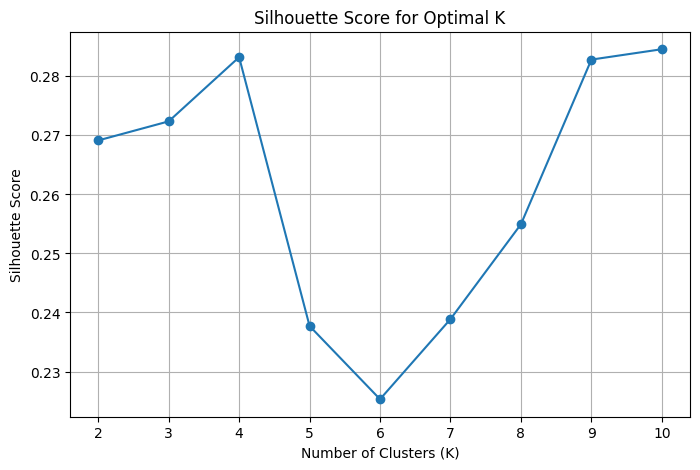


The optimal number of clusters is: 10


In [30]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_range = range(2, 11) # Silhouette score requires at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Find the optimal K with the highest score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nThe optimal number of clusters is: {optimal_k}")

In [ ]:
optimal_k = 10

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
city_avg['Cluster'] = kmeans.fit_predict(scaled_features)

print(f"Successfully clustered cities into {optimal_k} groups.")


print("\n--- Final Cluster Profiles ---")
cluster_profiles = city_avg.groupby('Cluster')[clustering_features].mean()
print(cluster_profiles)

for cluster_num, group_df in city_avg.groupby('Cluster'):
    print(f"\n--- Cities in Cluster {cluster_num} ---")
    
    cities_in_cluster = group_df['City'].tolist()
    
    print(cities_in_cluster)

Successfully clustered cities into 10 groups.

--- Final Cluster Profiles ---
              PM2.5        PM10        NO2         CO        SO2         O3  \
Cluster                                                                       
0         44.506667   87.497051  27.684162   0.900756   9.652263  33.014643   
1         58.852216  152.208822  15.694378   1.694486  24.481514  19.695114   
2        109.327028  110.822422  30.700307   1.609328  13.339451  35.762926   
3         61.826292   99.509736  47.726351  15.735580  40.569816  36.320139   
4         24.557489   45.664176   7.791995   0.790147  12.487020   4.844182   
5         55.225210  108.852705  15.443757   0.898084  10.688956  22.005008   
6        117.127835  227.553405  50.756217   1.976053  15.532145  50.467153   
7         29.609307   52.644802   8.634586   0.956342   5.384266  31.301009   
8         52.225003  120.861043  31.664217   0.841073  11.996847  52.724642   
9         53.646758  136.959966  12.194705   0.762643

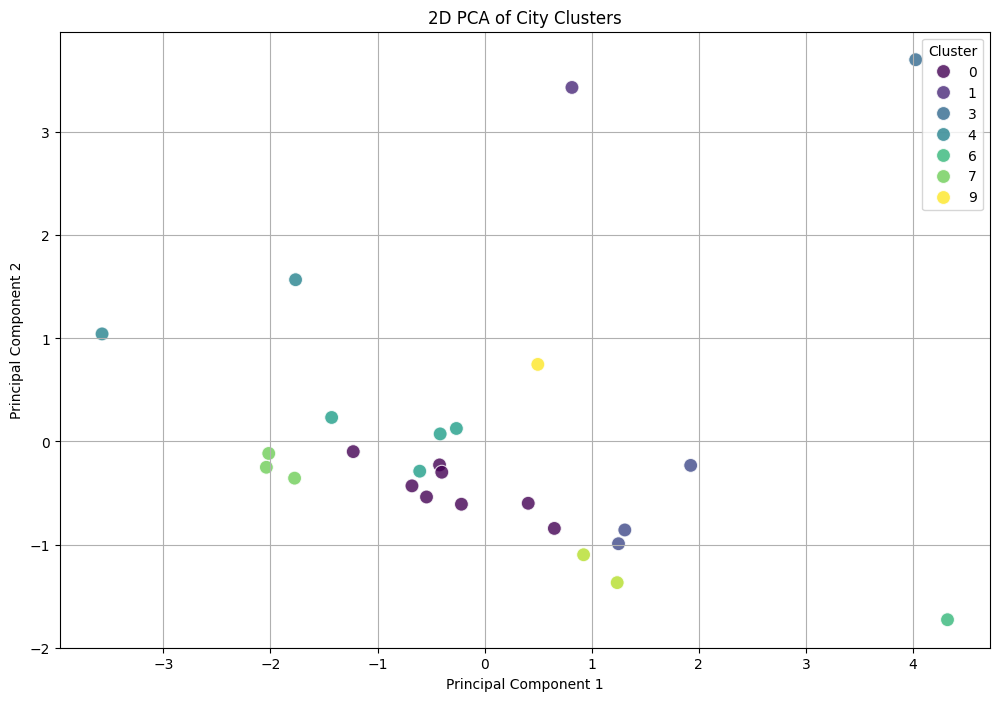

In [31]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Reduce the 7-dimensional scaled data to 2 dimensions using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# 2. Create a new dataframe with the PCA results and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = city_avg['Cluster']
pca_df['City'] = city_avg['City'] # Optional: for labeling points later

# 3. Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)

plt.title('2D PCA of City Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

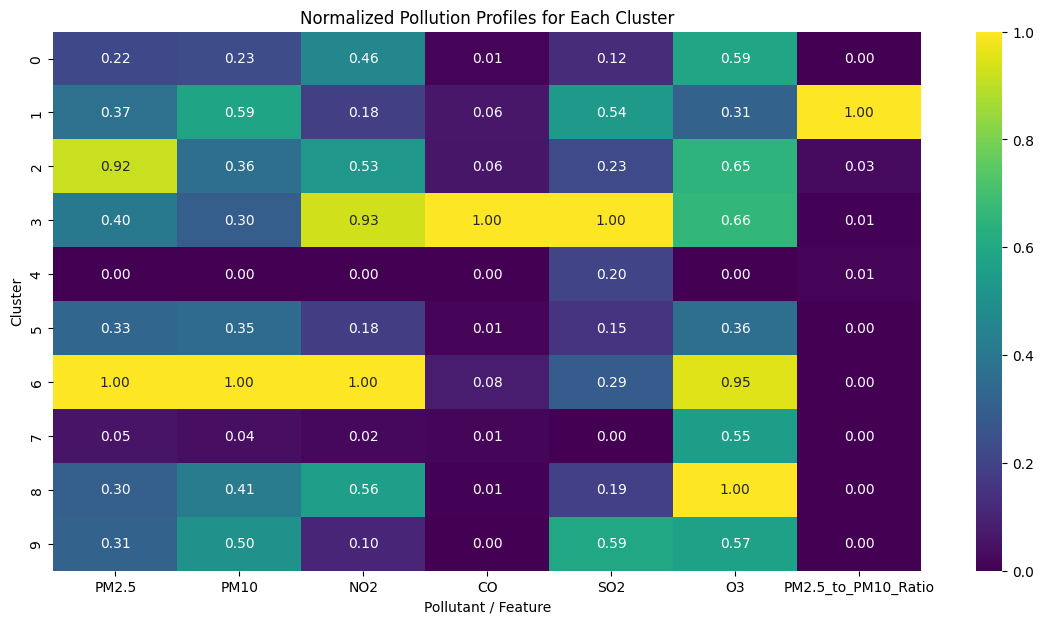

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
profiles_scaled = scaler.fit_transform(cluster_profiles)
profiles_scaled_df = pd.DataFrame(profiles_scaled, index=cluster_profiles.index, columns=cluster_profiles.columns)


# Create the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(profiles_scaled_df, annot=True, cmap='viridis', fmt='.2f')
plt.title('Normalized Pollution Profiles for Each Cluster')
plt.xlabel('Pollutant / Feature')
plt.ylabel('Cluster')
plt.show()

| Cluster | Suggested Profile Name | Key Characteristics | Cities |
| :-----: | :--------------------------------: | :----------------------------------------------------------------: | :----------------------------------: |
| 6 | Extreme Particulate Matter Hotspot | Highest PM2.5, PM10, and NO₂. | Delhi |
| 3 | Industrial & Combustion Zone | Highest CO and SO₂. | Ahmedabad |
| 2 | High PM2.5 Urban Centers | Very high PM2.5, but lower PM10 than Cluster 6. High NO₂. | Gurugram, Lucknow, Patna |
| 1 | Data Anomaly / Mining Hub | Very high SO₂ and a likely erroneous PM ratio. | Talcher |
| 8 | High Ozone Cities | Moderate PM, but the highest O₃ (ozone). | Bhopal, Jaipur |
| 9 | Moderate PM & High SO₂ Zone | Moderate PM levels with unusually high SO₂. | Jorapokhar |
| 0 | Major Metro Moderate Pollution | Balanced, moderate pollution across major coastal/southern metros. | Bengaluru, Chennai, Mumbai, etc. |
| 5 | North/East Moderate Pollution | Moderate PM2.5 and PM10. | Amritsar, Chandigarh, Guwahati, etc. |
| 7 | Low PM & SO₂ Cities | Low particulate matter and the lowest SO₂. | Shillong, Thiruvananthapuram, etc. |
| 4 | Clean Air Cities | Lowest overall pollution levels. | Aizawl, Kochi |